In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
f = pd.read_csv("BTCUSDT.csv")

In [60]:
nf = pd.DataFrame()
nf["stime"] = f.loc[:, "0"]
nf["meanp"] = f.loc[:, [str(i) for i in [1,2,3,4]]].mean(axis=1)
nf["stdp"] = f.loc[:, [str(i) for i in [1,2,3,4]]].std(axis=1)
nf["bvol"] = f.loc[:, "10"]
nf["svol"] = f.loc[:, "7"]-f.loc[:, "10"]
nf["ntrds"] = f.loc[:, "8"]
display(nf.head())
print(nf.columns.to_list())

,stime,meanp,stdp,bvol,svol,ntrds
0,1502942400000,4266.250,9.540000,2089.104962,7244.516000,9
1,1502942700000,4261.480,0.000000,0.000000,0.000000,0
2,1502943000000,4261.480,0.000000,0.000000,0.000000,0
3,1502943300000,4262.330,1.700000,364.218136,1701.229692,9
4,1502943600000,4265.585,0.814064,6595.688039,3335.473086,11


['stime', 'meanp', 'stdp', 'bvol', 'svol', 'ntrds']


In [115]:
def get_frame(at=50000, length=288):
    return nf.iloc[at:at+length, :]

def plot_frame(f, mxis=[]):
    ps = f["meanp"].to_numpy()
    mn = ps.min()
    mx = ps.max()
    plt.plot(ps)
    if len(mxis)>0:
        plt.vlines(x = mxis, ymin = mn, ymax = mx, colors = 'purple',)

    
def unique(xs):
    ys = []
    for x in xs:
        if x in ys:
            continue
        ys.append(x)
    return ys

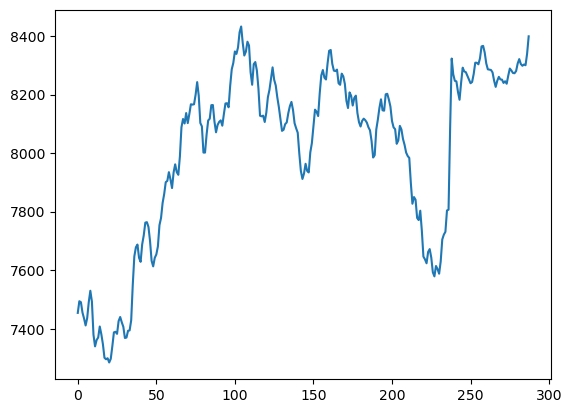

In [108]:
f = get_frame()
plot_frame(f)

In [111]:
fee = 0.01
window = 10
change = lambda f,i:(f-i)/i

mxis = []
mnis = []

ps = f.loc[:, "meanp"].to_numpy()
last_mn = np.inf
last_mxi = 0

for i in range(ps.shape[0]-window):
    mxi = i+np.argmax(ps[i:i+window])
    mni = i+np.argmin(ps[i:i+window])

    if ps[mni]<last_mn:
        if mni>last_mxi:
            last_mn = ps[mni]
        if mxi<mni:
            continue
    
    if change(ps[mxi], last_mn) > 2*fee:
        last_mxi = mxi
        mxis.append(mxi)
        last_mn = ps[mxi]

mxis = unique(mxis)

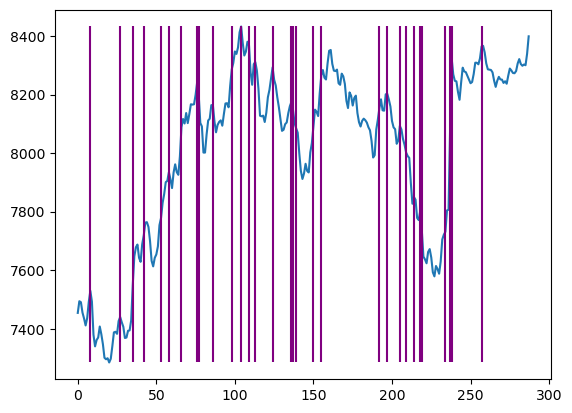

In [116]:
plot_frame(f, mxis=mxis)

In [117]:
mxis

[8,
 27,
 35,
 42,
 53,
 58,
 66,
 76,
 77,
 86,
 98,
 104,
 109,
 113,
 124,
 136,
 137,
 139,
 150,
 155,
 192,
 197,
 205,
 209,
 214,
 218,
 219,
 234,
 237,
 238,
 257]